# OpenCV

In [ ]:
pip install opencv-contrib-python
pip install caer

In [1]:
import gc
import os
import caer
import canaro
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split

--------------------------------------------------------------------------------------------------

## Read

Reading Photos

In [3]:
img1 = cv.imread('(Files)/OPENCV/Photos/cat.jpg')

img2 = cv.imread('(Files)/OPENCV/Photos/cat_large.jpg')

cv.imshow('Cat1', img1)
cv.imshow('Cat2', img2)

cv.waitKey(0)
cv.destroyAllWindows()

Reading Videos

In [7]:
capture = cv.VideoCapture('(Files)/OPENCV/Videos/Dog.mp4')

while True:
    isTrue, frame = capture.read()

    cv.imshow('Video', frame)

    if cv.waitKey(20) & 0xFF==ord('b'):
        break

capture.release()
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Rescale

Resizing Photos

In [13]:
def rescaleFrame(frame, scale=0.2):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    
    dimensions = (width,height)

    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)


image = cv.imread('(Files)/OPENCV/Photos/cat.jpg')
cv.imshow('Cat1', image)

resized_image = rescaleFrame(image)
cv.imshow('Cat2', resized_image)

cv.waitKey(0)
cv.destroyAllWindows()

Resizing Videos

In [16]:
def rescaleFrame(frame, scale=0.2):
    width = int(frame.shape[1] * scale)
    height = int(frame.shape[0] * scale)
    
    dimensions = (width,height)

    return cv.resize(frame, dimensions, interpolation=cv.INTER_AREA)


capture = cv.VideoCapture('(Files)/OPENCV/Videos/Dog.mp4')

while True:
    isTrue, frame = capture.read()

    frame_resized = rescaleFrame(frame)

    cv.imshow('Video', frame)
    cv.imshow('Video Resized', frame_resized)

    if cv.waitKey(20) & 0xFF==ord('b'):
        break

capture.release()
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Draw

In [4]:
img = cv.imread('(Files)/OPENCV/Photos/cat.jpg')
cv.imshow('Cat', img)

cv.waitKey(0)
cv.destroyAllWindows()

Paint The Image a Certain Colour

In [5]:
blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

blank[200:300, 300:400] = 255,0,0
cv.imshow('Blue', blank)

blank[:] = 0,255,0
cv.imshow('Green', blank)

blank[:] = 0,0,255
cv.imshow('Red', blank)

cv.waitKey(0)
cv.destroyAllWindows()

Draw a Rectangle

In [6]:
blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

cv.rectangle(blank, (0,0), (100,100), (0,255,0), thickness=2)
cv.rectangle(blank, (250,250), (350,350), (0,255,0), thickness=-1)
cv.imshow('Rectangle', blank)

cv.waitKey(0)
cv.destroyAllWindows()

Draw a Circle

In [7]:
blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

cv.rectangle(blank, (0,0), (100,100), (0,255,0), thickness=2)
cv.circle(blank, (250,250), (25), (0,0,255), thickness=2)
cv.circle(blank, (400,400), (25), (0,255,0), thickness=-1)
cv.imshow('Circle', blank)

cv.waitKey(0)
cv.destroyAllWindows()

Draw a Line

In [8]:
blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

cv.line(blank, (10,10), (250,250), (255,255,255))
cv.imshow('Line', blank)

cv.waitKey(0)
cv.destroyAllWindows()

Write Text

In [10]:
blank = np.zeros((500,500,3), dtype='uint8')
cv.imshow('Blank', blank)

cv.putText(blank, 'Hello, I am Kerem', (0,250), cv.FONT_HERSHEY_TRIPLEX, 1.0, (0,255,0), 4)
cv.imshow('Text', blank)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Basic

In [12]:
img = cv.imread('(Files)/OPENCV/Photos/park.jpg')
cv.imshow('Park', img)

cv.waitKey(0)
cv.destroyAllWindows()

Converting to Grayscale

In [3]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0)
cv.destroyAllWindows()

Blur

In [4]:
blur = cv.GaussianBlur(img, (7,7), cv.BORDER_DEFAULT)
cv.imshow('Blur', blur)

cv.waitKey(0)
cv.destroyAllWindows()

Edge Cascade

In [7]:
canny = cv.Canny(blur, 125, 175)
cv.imshow('Canny Edges', canny)

cv.waitKey(0)
cv.destroyAllWindows()

Dilating the Image

In [8]:
dilated = cv.dilate(canny, (7,7), iterations=3)
cv.imshow('Dilated', dilated)

cv.waitKey(0)
cv.destroyAllWindows()

Eroding

In [9]:
eroded = cv.erode(dilated, (3,3), iterations=1)
cv.imshow('Eroded', eroded)

cv.waitKey(0)
cv.destroyAllWindows()

Resize

In [10]:
resized = cv.resize(img, (500,500), interpolation=cv.INTER_AREA)
cv.imshow('Resized', resized)

cv.waitKey(0)
cv.destroyAllWindows()

Cropping

In [3]:
cropped = img[50:200, 200:400]
cv.imshow('Cropped', cropped)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Transformations

In [4]:
img = cv.imread('(Files)/OPENCV/Photos/park.jpg')
cv.imshow('Park', img)

cv.waitKey(0)
cv.destroyAllWindows()

Translation

In [5]:
def translate(img, x, y):
    transMat = np.float32([[1,0,x],[0,1,y]])
    dimensions = (img.shape[1], img.shape[0])
    return cv.warpAffine(img, transMat, dimensions)

# -x --> Left
# -y --> Up
#  x --> Right
#  y --> Down 

translated1 = translate(img, 100, 100)
cv.imshow('Trasnlated1', translated1)

translated2 = translate(img, -100, -100)
cv.imshow('Trasnlated2', translated2)

cv.waitKey(0)
cv.destroyAllWindows()

Rotation

In [6]:
def rotate(img, angle, rotPoint=None):
    (height,width) = img.shape[:2]

    if rotPoint is None:
        rotPoint = (width//2, height//2)

    rotMat = cv.getRotationMatrix2D(rotPoint, angle, 1.0)
    dimensions = (width, height)

    return cv.warpAffine(img, rotMat, dimensions)

rotated = rotate(img, 180)
cv.imshow('Rotated', rotated)

cv.waitKey(0)
cv.destroyAllWindows()

Resizing

In [7]:
resized = cv.resize(img, (500,500), interpolation=cv.INTER_CUBIC)
cv.imshow('Resized', resized)

cv.waitKey(0)
cv.destroyAllWindows()

Flipping

In [9]:
flip_vertical = cv.flip(img, 1)
cv.imshow('Flip_Vertical', flip_vertical)

flip_horizontal = cv.flip(img, 0)
cv.imshow('Flip_Horizontal', flip_horizontal)

cv.waitKey(0)
cv.destroyAllWindows()

Cropping

In [10]:
cropped = img[200:400, 300:400]
cv.imshow('Cropped', cropped)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Contours

In [4]:
img = cv.imread('(Files)/OPENCV/Photos/cats.jpg')
cv.imshow('Cats', img)

blank = np.zeros(img.shape, dtype='uint8')
cv.imshow('Blank', blank)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow('Gray', gray)

cv.waitKey(0)
cv.destroyAllWindows()

Canny Method

In [6]:
blur = cv.GaussianBlur(gray, (5,5), cv.BORDER_DEFAULT)
cv.imshow('Blur', blur)

canny = cv.Canny(blur, 125, 175)
cv.imshow('Canny Edges', canny)

contours, hierarchies = cv.findContours(canny, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

cv.drawContours(blank, contours, -1, (0,0,255), 1)
cv.imshow('Contours Drawn', blank)

cv.waitKey(0)
cv.destroyAllWindows()

380 contour(s) found!


Threshold Method

In [7]:
ret, thresh = cv.threshold(gray, 125, 255, cv.THRESH_BINARY)
cv.imshow('Thresh', thresh)

contours, hierarchies = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
print(f'{len(contours)} contour(s) found!')

cv.drawContours(blank, contours, -1, (0,0,255), 1)
cv.imshow('Contours Drawn', blank)

cv.waitKey(0)
cv.destroyAllWindows()

839 contour(s) found!


--------------------------------------------------------------------------------------------------

## Translate

In [2]:
img = cv.imread("(Files)/OPENCV/Photos/park.jpg")
cv.imshow("Park", img)

cv.waitKey(0)
cv.destroyAllWindows()

BGR to Grayscale

In [5]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

cv.waitKey(0)
cv.destroyAllWindows()

BGR to HSV

In [9]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
cv.imshow("HSV", hsv)

cv.waitKey(0)
cv.destroyAllWindows()

HSV to BGR

In [10]:
hsv_bgr = cv.cvtColor(hsv, cv.COLOR_HSV2BGR)
cv.imshow("HSV --> BGR", hsv_bgr)

cv.waitKey(0)
cv.destroyAllWindows()

BGR to LAB

In [11]:
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
cv.imshow("LAB", lab)

cv.waitKey(0)
cv.destroyAllWindows()

LAB to BGR

In [12]:
lab_bgr = cv.cvtColor(lab, cv.COLOR_LAB2BGR)
cv.imshow("LAB --> BGR", lab_bgr)

cv.waitKey(0)
cv.destroyAllWindows()

BGR to RGB

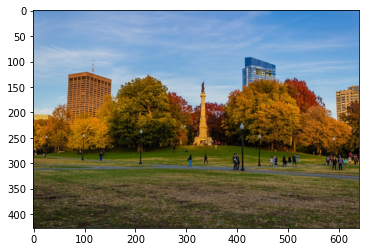

In [13]:
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
cv.imshow("RGB", rgb)

plt.imshow(rgb)
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Mix Pictures

In [2]:
img     = cv.imread("(Files)/OPENCV/Photos/park.jpg")
cv.imshow("Park", img)

blank   = np.zeros(img.shape[:2], dtype="uint8")
cv.imshow("Blank", blank)

cv.waitKey(0)
cv.destroyAllWindows()

Split

In [4]:
b,g,r   = cv.split(img)

cv.imshow("B", b)
cv.imshow("G", g)
cv.imshow("R", r)

merged  = cv.merge([b,g,r])
cv.imshow("Merged Image", merged)

print(img.shape)
print(b.shape)
print(g.shape)
print(r.shape)

cv.waitKey(0)
cv.destroyAllWindows()

(427, 640, 3)
(427, 640)
(427, 640)
(427, 640)


Split Color Filter

In [5]:
b,g,r   = cv.split(img)

blue    = cv.merge([b,blank,blank])
green   = cv.merge([blank,g,blank])
red     = cv.merge([blank,blank,r])

cv.imshow("Blue", blue)
cv.imshow("Green", green)
cv.imshow("Red", red)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Smoothing

In [7]:
img = cv.imread("(Files)/OPENCV/Photos/cats.jpg")
cv.imshow("Cats", img)

cv.waitKey(0)
cv.destroyAllWindows()

Averaging

In [8]:
average = cv.blur(img, (7,7))
cv.imshow("Average Blur", average)

cv.waitKey(0)
cv.destroyAllWindows()

Gaussian Blur

In [9]:
gauss = cv.GaussianBlur(img, (7,7), 0)
cv.imshow("Gaussian Blur", gauss)

cv.waitKey(0)
cv.destroyAllWindows()

Median Blur

In [11]:
median = cv.medianBlur(img, 7)
cv.imshow("Median Blur", median)

cv.waitKey(0)
cv.destroyAllWindows()

Bilateral

In [13]:
bilateral = cv.bilateralFilter(img, 10, 35, 25)
cv.imshow("Bilateral", bilateral)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Bitwise

In [4]:
blank = np.zeros((400,400), dtype="uint8")

rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)

cv.imshow("Rectangle", rectangle)
cv.imshow("Circle", circle)

cv.waitKey(0)
cv.destroyAllWindows()

bitwise AND --> intersect

In [16]:
bitwise_and = cv.bitwise_and(rectangle, circle)
cv.imshow("Bitwise AND", bitwise_and)

cv.waitKey(0)
cv.destroyAllWindows()

bitwise OR --> union

In [5]:
bitwise_or = cv.bitwise_or(rectangle, circle)
cv.imshow("Bitwise OR", bitwise_or)

cv.waitKey(0)
cv.destroyAllWindows()

bitwise XOR --> non-intersect

In [6]:
bitwise_xor = cv.bitwise_xor(rectangle, circle)
cv.imshow("Bitwise XOR", bitwise_xor)

cv.waitKey(0)
cv.destroyAllWindows()

bitwise NOT --> invert color

In [7]:
bitwise_not = cv.bitwise_not(rectangle)
cv.imshow("Bitwise NOT", bitwise_not)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Masking

In [2]:
img = cv.imread("(Files)/OPENCV/Photos/cats 2.jpg")
cv.imshow("Cats", img)

blank = np.zeros(img.shape[:2], dtype="uint8")
cv.imshow("Blank", blank)

cv.waitKey(0)
cv.destroyAllWindows()

Mask 1

In [4]:
mask1 = cv.circle(blank.copy(), (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv.imshow("Mask1", mask1)

masked1 = cv.bitwise_and(img, img, mask=mask1)
cv.imshow("Masked1", masked1)

cv.waitKey(0)
cv.destroyAllWindows()

Mask 2

In [3]:
mask2 = cv.rectangle(blank.copy(), (100,100), (400,400), 255, -1)
cv.imshow("Mask2", mask2)

masked2 = cv.bitwise_and(img, img, mask=mask2)
cv.imshow("Masked2", masked2)

cv.waitKey(0)
cv.destroyAllWindows()

Mask 3

In [4]:
rectangle = cv.rectangle(blank.copy(), (30,30), (370,370), 255, -1)
circle = cv.circle(blank.copy(), (200,200), 200, 255, -1)
weird_shape = cv.bitwise_and(rectangle, circle)
cv.imshow("Weird Shape", weird_shape)

masked_weird = cv.bitwise_and(img, img, mask=weird_shape)
cv.imshow("Masked Weird", masked_weird)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Histogram

In [6]:
img = cv.imread("(Files)/OPENCV/Photos/cats.jpg")
cv.imshow("Cats", img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

blank = np.zeros(img.shape[:2], dtype="uint8")
cv.imshow("Blank", blank)

circle = cv.circle(blank, (img.shape[1]//2, img.shape[0]//2), 100, 255, -1)
cv.imshow("Circle", circle)

mask1 = cv.bitwise_and(gray, gray, mask=circle)
cv.imshow("Mask1", mask1)

mask2 = cv.bitwise_and(img, img, mask=circle)
cv.imshow("Mask2", mask2)

cv.waitKey(0)
cv.destroyAllWindows()

Grayscale Histogram

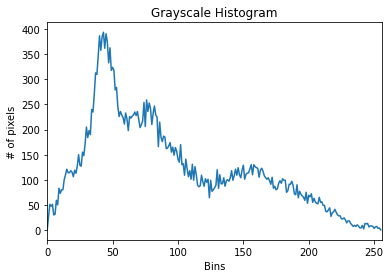

In [8]:
gray_hist = cv.calcHist([gray], [0], mask1, [256], [0,256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

Color Histogram

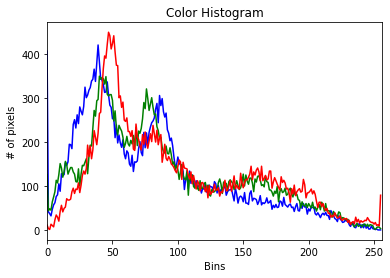

In [9]:
plt.figure()
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of pixels")

colors = ("b", "g", "r")
for i,col in enumerate(colors):
    hist = cv.calcHist([img], [i], circle, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])

plt.show()

--------------------------------------------------------------------------------------------------

## Thresh

In [10]:
img = cv.imread("(Files)/OPENCV/Photos/cats.jpg")
cv.imshow("Cats", img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

cv.waitKey(0)
cv.destroyAllWindows()

Simple Thresholding

In [11]:
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow("Simple Threshold", thresh)

threshold, thresh_inv = cv.threshold(gray, 150, 255, cv.THRESH_BINARY_INV)
cv.imshow("Simple Threshold Inverse", thresh_inv)

cv.waitKey(0)
cv.destroyAllWindows()

Adaptive Thresholding

In [12]:
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 9)
cv.imshow("Adaptive Thresholding", adaptive_thresh)

adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 11, 9)
cv.imshow("Adaptive Thresholding Inverse", adaptive_thresh)

adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 9)
cv.imshow("Adaptive Thresholding Gaussian", adaptive_thresh)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Gradients

In [4]:
img = cv.imread("(Files)/OPENCV/Photos/park.jpg")
cv.imshow("Park", img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

cv.waitKey(0)
cv.destroyAllWindows()

Laplacian

In [5]:
lap = cv.Laplacian(gray, cv.CV_64F)
lap = np.uint8(np.absolute(lap))
cv.imshow("Laplacian", lap)

cv.waitKey(0)
cv.destroyAllWindows()

Sobel

In [6]:
sobelx = cv.Sobel(gray, cv.CV_64F, 1, 0)
cv.imshow("Sobel X", sobelx)

sobely = cv.Sobel(gray, cv.CV_64F, 0, 1)
cv.imshow("Sobel Y", sobely)

sobel_combine = cv.bitwise_or(sobelx, sobely)
cv.imshow("Sobel Combine", sobel_combine)

canny = cv.Canny(gray, 150, 175)
cv.imshow("Canny", canny)

cv.waitKey(0)
cv.destroyAllWindows()

--------------------------------------------------------------------------------------------------

## Face Detect

In [6]:
img = cv.imread("(Files)/OPENCV/Photos/group 1.jpg")
cv.imshow("Color", img)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
cv.imshow("Gray", gray)

haar_cascade = cv.CascadeClassifier("(Files)/OPENCV/haar_face.xml")

faces_rect = haar_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=1)

print(f"Number of faces found = {len(faces_rect)}")

for (x,y,w,h) in faces_rect:
    cv.rectangle(img, (x, y), (x+w, y+h), (0,255,0), thickness=2)

cv.imshow("Detected Faces", img)

cv.waitKey(0)
cv.destroyAllWindows()

Number of faces found = 19


--------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------

## Machine Learning

In [38]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'C:\Users\Kerem\Desktop\OpenCV\Simpsons\simpsons_dataset'

Creating a character dictionary, sorting it in descending order

In [39]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

Sort in descending order

In [40]:
char_dict = caer.sort_dict(char_dict, descending=True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('simpsons_dataset', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

Getting the first 10 categories with the most number of images

In [41]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

Create the training data

In [42]:
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.007004737854003906s
[INFO] At 1000 files
[INFO] 1454 files found in 0.003996133804321289s
[INFO] At 1000 files
[INFO] 1452 files found in 0.004000186920166016s
[INFO] At 1000 files
[INFO] 1354 files found in 0.004000186920166016s
[INFO] At 1000 files
[INFO] 1342 files found in 0.003999948501586914s
[INFO] At 1000 files
[INFO] 1291 files found in 0.003005504608154297s
[INFO] At 1000 files
[INFO] 1206 files found in 0.0039997100830078125s
[INFO] At 1000 files
[INFO] 1194 files found in 0.003999948501586914s
[INFO] At 1000 files
[INFO] 1193 files found in 0.002999544143676758s
[INFO] At 1000 files
[INFO] 1079 files found in 0.003999948501586914s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 17s


Number of training samples

In [43]:
len(train)

13811

Visualizing the data (OpenCV doesn't display well in Jupyter notebooks)

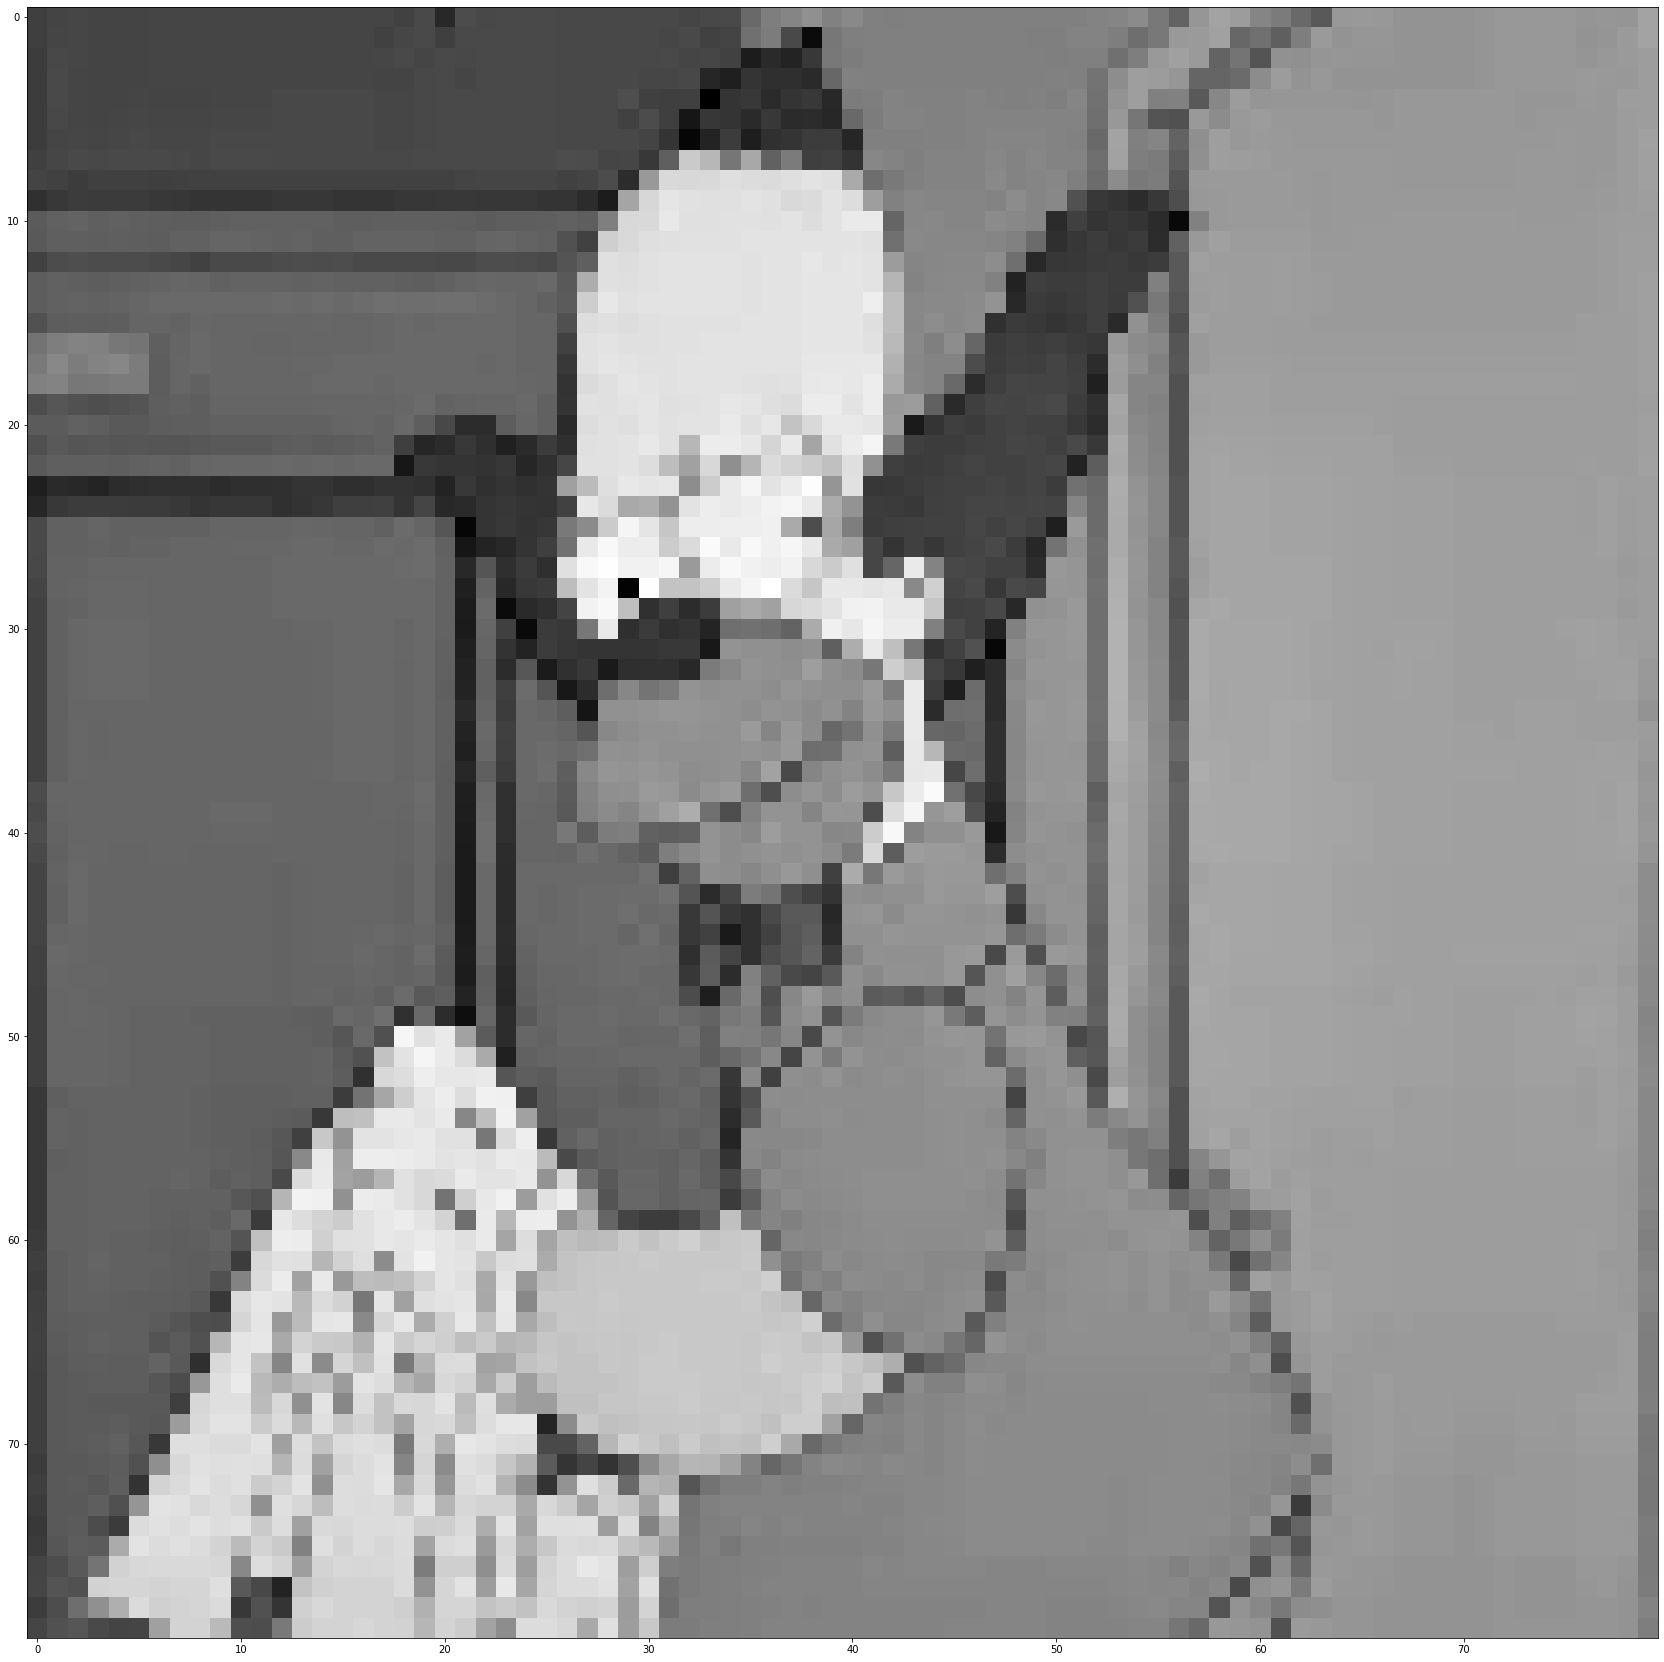

In [44]:
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

Separating the array and corresponding labels

In [45]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)

Normalize the featureSet ==> (0,1)

In [46]:
featureSet = caer.normalize(featureSet)

Converting numerical labels to binary class vectors

In [47]:
labels = to_categorical(labels, len(characters))

In [53]:
x_train, x_val, y_train, y_val = train_test_split(featureSet, labels, test_size=0.2)

print ("X_train: ", x_train)
print ("y_train: ", y_train)
print("X_test: ", x_val)
print ("y_test: ", y_val)

X_train:  [[[[0.5294118 ]
   [0.5294118 ]
   [0.5058824 ]
   ...
   [0.61960787]
   [0.61960787]
   [0.6       ]]

  [[0.5294118 ]
   [0.5294118 ]
   [0.5058824 ]
   ...
   [0.61960787]
   [0.61960787]
   [0.6039216 ]]

  [[0.5294118 ]
   [0.5294118 ]
   [0.5019608 ]
   ...
   [0.61960787]
   [0.61960787]
   [0.61960787]]

  ...

  [[0.5019608 ]
   [0.5019608 ]
   [0.2509804 ]
   ...
   [0.13725491]
   [0.0627451 ]
   [0.0627451 ]]

  [[0.5019608 ]
   [0.5019608 ]
   [0.23921569]
   ...
   [0.5176471 ]
   [0.05490196]
   [0.0627451 ]]

  [[0.5019608 ]
   [0.5019608 ]
   [0.23529412]
   ...
   [0.627451  ]
   [0.05098039]
   [0.0627451 ]]]


 [[[0.41960785]
   [0.41960785]
   [0.41960785]
   ...
   [0.24705882]
   [0.21960784]
   [0.4117647 ]]

  [[0.41960785]
   [0.41960785]
   [0.41960785]
   ...
   [0.28235295]
   [0.22352941]
   [0.4117647 ]]

  [[0.41960785]
   [0.41960785]
   [0.41960785]
   ...
   [0.40784314]
   [0.3882353 ]
   [0.42745098]]

  ...

  [[0.34901962]
   [0.3490196

Deleting some variables

In [54]:
del train
del featureSet
del labels 
gc.collect()

4704

Useful variables when training

In [89]:
BATCH_SIZE = 32
EPOCHS = 10

Image data generator (introduces randomness in network ==> better accuracy)

In [90]:
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

Create our model (returns a compiled model)

In [91]:
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-7, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 80, 80, 32)        320       
                                                                 
 conv2d_43 (Conv2D)          (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 39, 39, 32)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 39, 39, 32)        0         
                                                                 
 conv2d_44 (Conv2D)          (None, 39, 39, 64)        18496     
                                                                 
 conv2d_45 (Conv2D)          (None, 37, 37, 64)        36928     
                                                      

Training the model

In [93]:
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)

Epoch 1/10
128/128 [==============================] - 139s 1s/step - loss: 0.3597 - accuracy: 0.1529 - val_loss: 0.3418 - val_accuracy: 0.1603 - lr: 0.0100
Epoch 2/10
128/128 [==============================] - 136s 1s/step - loss: 0.3241 - accuracy: 0.1627 - val_loss: 0.3375 - val_accuracy: 0.1603 - lr: 0.0100
Epoch 3/10
128/128 [==============================] - 137s 1s/step - loss: 0.3237 - accuracy: 0.1612 - val_loss: 0.3368 - val_accuracy: 0.1603 - lr: 0.0100
Epoch 4/10
128/128 [==============================] - 137s 1s/step - loss: 0.3234 - accuracy: 0.1627 - val_loss: 0.3358 - val_accuracy: 0.1603 - lr: 0.0100
Epoch 5/10
128/128 [==============================] - 137s 1s/step - loss: 0.3231 - accuracy: 0.1619 - val_loss: 0.3357 - val_accuracy: 0.1603 - lr: 0.0100
Epoch 6/10
128/128 [==============================] - 131s 1s/step - loss: 0.3228 - accuracy: 0.1616 - val_loss: 0.3362 - val_accuracy: 0.1603 - lr: 0.0100
Epoch 7/10
128/128 [==============================] - 129s 1s/st

In [94]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

Testing

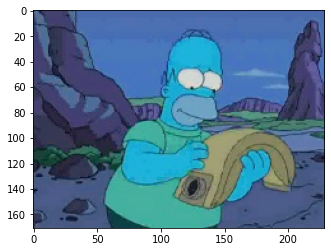

In [110]:
test_path = r'(Files)\OPENCV\Simpsons\kaggle_simpson_testset\kaggle_simpson_testset\homer_simpson_1.jpg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()


def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image


predictions = model.predict(prepare(img))

In [111]:
cv.imshow("IMG", img)

cv.waitKey(0)
cv.destroyAllWindows()

Getting class with the highest probability

In [112]:
print(characters[np.argmax(predictions[0])])

homer_simpson
